<a href="https://colab.research.google.com/github/NicoPatalagua/ExploracionDatos/blob/master/Modelo02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segundo Parcial: Análisis Exploratorio de Datos.** 

### Nicolás Patalagua Suárez 
### Universidad Sergio Arboleda

# Modelo **02**

### Descripción de Valores:

    join_date: fecha año-mes-dia hora:minuto:segundo.
    group: houston machine learning, houstonr, houston data science,
           houston energy data science, houston data visualization.
    city:  Houston, Katy, Orizaba, Spring, Cold Spring Harbor,
           Kenmore, Sugar Land, Colorado Springs, Pearland, Austin, ....
    state: TX, NY, WA, CO, MD, CA, LA, GA, MO, NC, FL, NH,
           MA, PA, KY, NE, IL, MN, TN, IN, OH, F2, NJ, NS, 
           VA, MI, 18, AR, AL, OR, DE, 17, ON, SC, BC, V5,
           WI, AB, DC, AK, UT, OK, AZ, MS, CT, IA.
    country: us, mx, il, be, cn, jp, gr, in, fr, my, de,
             ye, np, no, au, gb, dz, co, tw, br, ie, pk,
             ca, hk, nl, ng, ae, sg, eg, ir, es, nz, se,
             za, cz, th, ch, by, pe, fi, kr, si, ph.
         
    

## 0.- Bibliotecas y Lectura

### **Pandas:** 
*Es una biblioteca de software escrita como extensión de NumPy para manipulación y análisis de datos para el lenguaje de programación Python. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.*
https://pandas.pydata.org/

In [0]:
#Importamos la biblioteca pandas y la asignamos a la variable pd
import pandas as pd

### **Numpy:**

*Es una extensión de Python, que le agrega mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices.*

In [0]:
#Importamos la biblioteca numpy y la asignamos a la variable np
import numpy as np

### **Matplotlib:**

*Es una biblioteca de trazado 2D de Python que produce cifras de calidad de publicación en una variedad de formatos impresos y entornos interactivos en todas las plataformas. Puede generar diagramas, histogramas, espectros de potencia, gráficos de barras, diagramas de error, diagramas de dispersión, etc., con solo unas pocas líneas de código.*

In [0]:
#Importamos la biblioteca matplotlib y la asignamos a la variable np
import matplotlib.pyplot as plt

In [0]:
#Creamos la variable dataset que contiene la localización del dataset que vamos a usar
dataset = 'meetup_groups.csv'

In [0]:
#Creamos la variable ObjMeetup y le asignamos la lectura del dataset con read csv
ObjMeetup = pd.read_csv(dataset,parse_dates=True)

In [24]:
#El método head devuelve las primeras n filas para el dataset
ObjMeetup.head()

,join_date,group,city,state,country
0,2016-11-18 02:41:29,houston machine learning,Houston,TX,us
1,2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2,2016-12-30 02:34:16,houston machine learning,Houston,TX,us
3,2016-07-18 00:48:17,houston machine learning,Houston,TX,us
4,2017-05-25 12:58:16,houston machine learning,Houston,TX,us


In [25]:
#Verificamos el tipo de datos contenidos
ObjMeetup.dtypes

join_date    object
group        object
city         object
state        object
country      object
dtype: object

In [26]:
#La columna 'join_date' la establecemos como un datetime
ObjMeetup['join_date']=pd.to_datetime(ObjMeetup['join_date'])
#Volvemos a verificar el tipo de datos
ObjMeetup.dtypes

join_date    datetime64[ns]
group                object
city                 object
state                object
country              object
dtype: object

## 1.- Identificación de datos perdidos (NaN)
    - Bonus --> ¿Cuantas Filas se han eliminado después de la limpieza?

In [28]:
#Con el mètodo Shape retornamos la dimensión del dataframe
ObjMeetup.shape

(7671, 5)

In [27]:
#Verficamos la cantidad de datos perdidos (NaN)
pd.isna(ObjMeetup).sum()

join_date      0
group          0
city           0
state        144
country        0
dtype: int64

In [0]:
#Con el método Dropna se eliminan valores perdidos
ObjData=ObjMeetup.dropna()

In [31]:
#Se verifica la nueva dimensión
ObjData.shape

(7527, 5)

In [33]:
#Verificamos que no existan datos NaN
pd.isna(ObjMeetup).sum()

join_date      0
group          0
city           0
state        144
country        0
dtype: int64

In [34]:
#Con el metodo shape obtenemos la cantidad de columnas y filas
#Si se agrega [0] se obtine solo la cantidad de columnas
print('Número de filas eliminadas tras la limpieza es:')
print((ObjMeetup.shape[0]-ObjData.shape[0]),' Filas')

Número de filas eliminadas tras la limpieza es:
144  Filas


## 2.- ¿Cuantas reuniones por grupo se registraron en el DataFrame? 
    - Haga un gráfico (Pastel) de reuniones por grupo en el DataFrame

In [35]:
#Verificamos los grupos que existen
ObjData['group'].unique()

array(['houston machine learning', 'houstonr', 'houston data science',
       'houston energy data science ', 'houston data visualization '],
      dtype=object)

In [42]:
#Realizamos el conteo de reuniones por grupo
ObjQGroup=ObjData['group'].value_counts()
print('Cantidad de reuniones por grupo:\n',ObjQGroup)

Cantidad de reuniones por grupo:
 houston data science            2150
houston energy data science     1891
houston data visualization      1709
houstonr                        1037
houston machine learning         740
Name: group, dtype: int64


Reuniones por grupo:


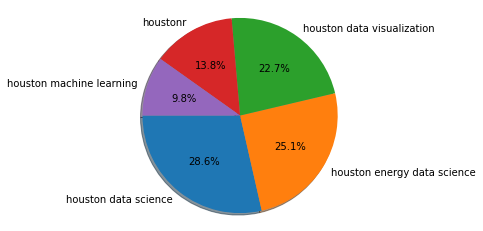

In [63]:
#Realizamos la grafica en base a los resultados de la consulta anterior
print('Reuniones por grupo:')
labels = ['houston data science','houston energy data science',
          'houston data visualization ','houstonr','houston machine learning']
sizes = ObjQGroup
fig, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal') 
plt.show()

## 3.-  ¿Cuál es la proporción de reuniones en la ciudad Houston?

In [64]:
#Contamos la cantidad de reuniones hechas en Houston
ObjHouston=((ObjData['city']=='Houston')).sum()
print('En Houston hubo:',ObjHouston,' reuniones')

En Houston hubo: 5560  reuniones


In [67]:
#Calculamos el porcentaje de reuniones en Houston 
ObjProporcionHouston=ObjHouston/(ObjData.shape[0])*100
#Redondeamos el dato
print("Proporción de reuniones en Houston: ",round(ObjProporcionHouston,2),"%")

Proporción de reuniones en Houston:  73.87 %


## 4.- Cuáles son las 10 ciudades más usadas en USA para reuniones de los grupos:
    - 'houston machine learning ' y 'houstonr'

In [0]:
ObjCity=ObjData[(ObjData['country'] == 'us') & 
                (ObjData['group'] == 'houston machine learning') | 
                (ObjData['group'] == 'houstonr')]

In [74]:
ObjCity=ObjCity['city'].value_counts(normalize=True)
print('El porcentaje de uso por ciudad por los grupos:\n',ObjCity.head(10)*100)

El porcentaje de uso por ciudad por los grupos:
 Houston          75.858188
Katy              2.757456
Spring            2.363534
Sugar Land        1.800788
Austin            1.406866
Cypress           1.181767
Pearland          0.900394
Humble            0.787845
League City       0.619021
San Francisco     0.619021
Name: city, dtype: float64


## 5.- Cuáles son las ciudades más usadas para reuniones fuera del USA por:
    -  'houston machine learning' y 'houstonr'

In [78]:
#Obtenemos reuniones fuera de USA
ObjNoUSA=ObjData[ObjData['country']!='us']
ObjNoUSA.head()

,join_date,group,city,state,country
1201,2015-02-25 12:48:49,houstonr,Winchester,F2,gb
1363,2012-10-29 17:09:59,houstonr,Manchester,18,gb
1551,2016-10-28 09:07:13,houstonr,London,17,gb
1557,2015-06-08 22:10:41,houstonr,London,17,gb
1700,2016-10-14 01:31:21,houstonr,Mississauga,ON,ca


In [80]:
#Obtenemos datos de los grupos solicitados
ObjNoUSAGroups=ObjNoUSA[(ObjData['group']=='houston machine learning')|
                  (ObjData['group'] == 'houstonr')]
ObjNoUSAGroups

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,join_date,group,city,state,country
1201,2015-02-25 12:48:49,houstonr,Winchester,F2,gb
1363,2012-10-29 17:09:59,houstonr,Manchester,18,gb
1551,2016-10-28 09:07:13,houstonr,London,17,gb
1557,2015-06-08 22:10:41,houstonr,London,17,gb
1700,2016-10-14 01:31:21,houstonr,Mississauga,ON,ca


In [86]:
#Obtenemos la cantidad de reuniones por ciudad
ObjNoUSACities=ObjNoUSAGroups['city'].value_counts(normalize=True)
#Imprimimos el resultado y el porcentaje
print('Ciudades más usadas por los grupos refereidos fuera de USA:')
ObjNoUSACities.head(5)*100

Ciudades más usadas por los grupos refereidos fuera de USA:


London         40.0
Mississauga    20.0
Winchester     20.0
Manchester     20.0
Name: city, dtype: float64

## 6.- El  grupo 'houston data visualization' cuando hace reuniones en USA:
    - ¿Es cierto que la segunda ciudad en donde hacen más reuniones es Austin?

In [96]:
#Sacar las reuniones del grupo en USA
ObjHDVM=ObjData[(ObjData['country']=='us')|
              (ObjData['group']=='houston data visualization')]
ObjHDVM.head(5)

,join_date,group,city,state,country
0,2016-11-18 02:41:29,houston machine learning,Houston,TX,us
1,2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2,2016-12-30 02:34:16,houston machine learning,Houston,TX,us
3,2016-07-18 00:48:17,houston machine learning,Houston,TX,us
4,2017-05-25 12:58:16,houston machine learning,Houston,TX,us


In [97]:
#Sacamos el porcentaje de reuniones por mes
ObjDateHDV=ObjHDVM.join_date.dt.month.value_counts(normalize=True)
ObjDateHDV.head(5)*100

7     12.093333
8     11.706667
6     11.386667
10     8.453333
1      8.373333
Name: join_date, dtype: float64

Del resultado anterior podemos concluir que en el mes 7 (Julio), en el mes 8 (Agosto) y en el mes 6 (junio), Houston data visualization tiende a realizar sus reuniones.

Se puede concluir que el grupo houston data visualization no hace reuniones en USA.

Ahora revisamos la ciudad para comprobar su Austin es la segunda ciudad donde se realizan más reuniones.

In [100]:
ObjAustin=ObjHDVM['city'].value_counts(normalize=True)
print('El grupo se reune en las siguientes ciudades de USA:')
ObjAustin.head(10)*100

El grupo se reune en las siguientes ciudades de USA:


Houston       74.133333
Katy           3.040000
Spring         2.840000
Sugar Land     2.146667
Austin         1.613333
Cypress        1.320000
Pearland       0.853333
Humble         0.800000
Bellaire       0.733333
Dallas         0.613333
Name: city, dtype: float64

De los datos anteriores se puede inferir que Austin ocupa el puesto 5 de las ciudades donde más realizan reuniones el grupo houston data visualization. El puesto 2 corresponde a Katy,ubicada en los condados de Harris, Waller y Butt en el estado estadounidense de Texas. 

## 7.- ¿Cuál fue el mes que más reuniones tuvo el grupo 'houstonr' en el año 2016?

        - Agregar columna 'month' y 'year'

<img src="graf02.png">

In [0]:
ObjData['join_date'].row.str.split('-',1)

AttributeError: 'Series' object has no attribute 'row'

## 8.- ¿Cuantas reuniones por año se registraron en el DataFrame?

## 9.- ¿Cuantas veces por año se han reunido los grupos ('houston data science', 'houston machine learning') fuera de USA en el dataframe?

In [0]:
ObjFinal=((ObjData['group']=='houston data science')& (ObjData['group']=='houston machine learning')& (ObjData['country']=='ca')&(ObjData['country']=='ga')).sum()
print('Reuniones de los grupos fuera de USA:',ObjFinal)

Reuniones de los grupos fuera de USA: 0


Se puede concluir que los grupos 'houston data science' y'houston machine learning', no se reunen fuea de USA